In this post, we'll write a quick Sankey diagram tutorial using the matplotlib tools for that.

# What are Sankey diagrams? 

[Sankey diagrams](https://en.wikipedia.org/wiki/Sankey_diagram) are diagrams representing flows between different nodes by using arrows whose width scales according to the value of the flow.

Two of the most famous Sankey diagrams (named after Irish captain Sankey) are Sankey's steam engine efficiency diagram and Minard's map of the French losses during the 1812 Russian campaign.

![Sankey's steam machine](https://upload.wikimedia.org/wikipedia/commons/1/10/JIE_Sankey_V5_Fig1.png)

![Minard's map of 1812](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

As one can see in the diagrams above, Sankey diagrams have the following components:

- individual "systems" or boxes (think of the steam engine components)
- that have inputs and outputs
- these inputs and outputs can be represented as branches that align with the system (they can flow from left, right or parallel to the system)
- the boxes connect to each other

These diagrams can be quite complicated to draw. Luckily for us, the matplotlib package comes with ways to draw these diagrams easily. Unfortunately, the documentation is not so easy to understand. That's where this tutorial comes in.

# How do Sankey diagrams work within matplotlib? 

It turns out that matplotlib comes with a module named `matplotlib.sankey`. Its API documentation is [here](http://matplotlib.org/api/sankey_api.html).

Also, the following examples are available : 

- a [basic example](http://matplotlib.org/examples/api/sankey_demo_basics.html), with a simple system and two connected systems
- an [example with links between systems](http://matplotlib.org/examples/api/sankey_demo_links.html)
- a [complex example drawing the Rankine cycle](http://matplotlib.org/examples/api/sankey_demo_rankine.html)

Generally, a Sankey diagram ought to be built like this:

Alternatively, one can do something like this:

This being said, let's move to our first diagram.

# Our first Sankey diagrams

In this section, we first import the necessary matplotlib tools.

In [1]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

We now build a Sankey with an input flow and an output flow of 1. The flows are specified with the `flows` argument, while labels are provided using `labels`.

[Bunch(patch=Poly((-0.25, 0.5) ...), angles=[0, 0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x00000000073F95F8>, <matplotlib.text.Text object at 0x00000000073F9AC8>], tips=[[ 0.16954982  0.        ]
  [ 0.6947228   0.        ]], flows=[ 1 -1])]

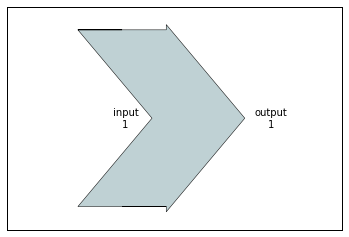

In [2]:
sankey = Sankey()
sankey.add(flows=[1, -1],
       labels=['input', 'output'])
sankey.finish()

There are other arguments that can be specified. For instance, one can change the orientation of the diagram using the `rotation` argument:

[Bunch(patch=Poly((0.5, 0.25) ...), angles=[-1.0, -1.0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x00000000075DC860>, <matplotlib.text.Text object at 0x00000000075DCD30>], tips=[[  1.03819319e-17  -1.69549816e-01]
  [  4.25395029e-17  -6.94722805e-01]], flows=[ 1 -1])]

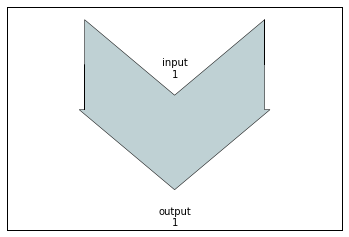

In [3]:
sankey = Sankey()
sankey.add(flows=[1, -1],
       labels=['input', 'output'],
          rotation=-90)
sankey.finish()

Let's go a step further by providing a third flow to our diagram. To do this, we need to specify an orientations argument. In the previous diagram, we had only to flows, so by default the Sankey module assumes those to be input and output. Now, we need to specify how the flows align with the diagram using a list of orientations. Here, putting an orientation of 1 means it comes from the side.

[Bunch(patch=Poly((0.75, 0.25) ...), angles=[-1.0, -1.0, 2.0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000000007635908>, <matplotlib.text.Text object at 0x0000000007635DD8>, <matplotlib.text.Text object at 0x000000000763A390>], tips=[[ -2.50000000e-01   5.80450184e-01]
  [  4.25395029e-17  -6.94722805e-01]
  [  7.90225092e-01   7.50000000e-01]], flows=[ 1.  -1.   0.5])]

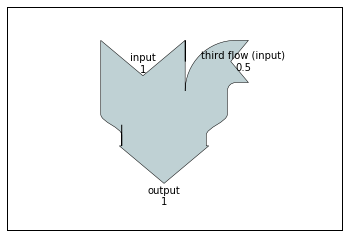

In [4]:
sankey = Sankey()
sankey.add(flows=[1, -1, 0.5],
           orientations=[0, 0, 1],
           labels=['input', 'output', 'third flow (input)'],
           rotation=-90)
sankey.finish()

The same thing can be done for an output (a fourth flow), but on the other side:

[Bunch(patch=Poly((0.75, 0.25) ...), angles=[-1.0, -1.0, 2.0, 2.0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000000007BD3160>, <matplotlib.text.Text object at 0x0000000007BD3630>, <matplotlib.text.Text object at 0x0000000007BD3BA8>, <matplotlib.text.Text object at 0x0000000007BD3B70>], tips=[[-0.25        0.58045018]
  [ 0.25       -1.4447228 ]
  [ 0.79022509  0.75      ]
  [-1.2349479  -0.75      ]], flows=[ 1.  -1.   0.5 -0.5])]

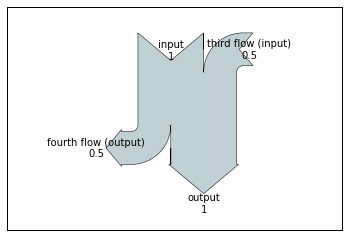

In [5]:
sankey = Sankey()
sankey.add(flows=[1, -1, 0.5, -0.5],
           orientations=[0, 0, 1, -1],
           labels=['input', 'output', 'third flow (input)', 'fourth flow (output)'],
           rotation=-90)
sankey.finish()

This is fun and all, but let's now see how we can connect two diagrams together.

# Connecting diagrams together 

The API documentation states that to connect sankey diagrams together, we need to provide the following arguments:

- `prior` which is an index of the prior diagram to which this diagram should be connected
- `connect` which is a `(prior, this)` tuple indexing the flow of the prior diagram and the flow of this diagram which should be connected

Basically `prior` is the zero based index of the previous diagram element. `connect` however is more cryptic. Let's start again with a simple input output diagram and try to connect it to another one.

[Bunch(patch=Poly((-0.25, 0.5) ...), angles=[0, 0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000000007C28FD0>, <matplotlib.text.Text object at 0x0000000007C304E0>], tips=[[ 0.16954982  0.        ]
  [ 0.6947228   0.        ]], flows=[ 1 -1]),
 Bunch(patch=Poly((0.275173, 0.5) ...), angles=[0, 0], text=Text(0.525173,0,''), texts=[<matplotlib.text.Text object at 0x0000000007C377F0>, <matplotlib.text.Text object at 0x0000000007C37CC0>], tips=[[ 0.6947228   0.        ]
  [ 1.21989579  0.        ]], flows=[ 1 -1])]

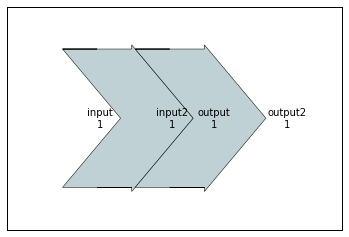

In [6]:
sankey = Sankey()

# first diagram, indexed by prior=0
sankey.add(flows=[1, -1],
       labels=['input', 'output'])

# second diagram indexed by prior=1
sankey.add(flows=[1, -1],
          labels=['input2', 'output2'],
          prior=0,
          connect=(1, 0))
sankey.finish()

It turns out that we can now give a simpler explanation of the `connect` argument: it says which flows (indexed in the order they were defined should be connected). So `connect` should really be described as 

> connect = (index_of_prior_flow, index_of_current_diagram_flow) that need to be connected

As one can see, the previous diagram does not look very nice. We can correct that by specifying the trunk lengths for each diagram (make them shorter or longer). According to the API:

> trunklength: length between the bases of the input and output groups

[Bunch(patch=Poly((-1.25, 0.5) ...), angles=[0, 0], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000000007C8FB00>, <matplotlib.text.Text object at 0x0000000007C8FFD0>], tips=[[-0.83045018  0.        ]
  [ 1.6947228   0.        ]], flows=[ 1 -1]),
 Bunch(patch=Poly((1.27517, 0.5) ...), angles=[0, 0], text=Text(1.52517,0,''), texts=[<matplotlib.text.Text object at 0x0000000007C9D320>, <matplotlib.text.Text object at 0x0000000007C9D7F0>], tips=[[ 1.6947228   0.        ]
  [ 2.21989579  0.        ]], flows=[ 1 -1])]

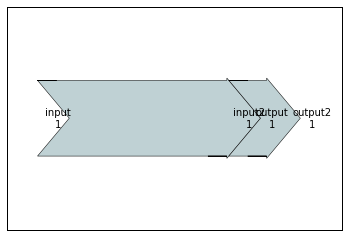

In [7]:
sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1],
       labels=['input', 'output'],
          trunklength=3)
sankey.add(flows=[1, -1],
          labels=['input2', 'output2'],
           trunklength=1.0,
          prior=0,
          connect=(1, 0))
sankey.finish()

Another argument that can be used is the pathlength. These only work for top and bottom flows. Again, according to the API:

> list of lengths of the arrows before break-in or after break-away If a single value is given, then it will be applied to the first (inside) paths on the top and bottom, and the length of all other arrows will be justified accordingly. The pathlengths are not applied to the horizontal inputs and outputs.

We can make another example for them:

[Bunch(patch=Poly((-0.25, 0.7) ...), angles=[0, 0, 3, 1], text=Text(0,0,''), texts=[<matplotlib.text.Text object at 0x0000000007CF13C8>, <matplotlib.text.Text object at 0x0000000007CF1898>, <matplotlib.text.Text object at 0x0000000007CF1E48>, <matplotlib.text.Text object at 0x0000000007CF1DD8>], tips=[[-0.38045018  0.1       ]
  [ 0.6947228   0.        ]
  [-0.55        1.15804502]
  [-0.65       -1.57413506]], flows=[ 1.  -1.   0.1  0.3]),
 Bunch(patch=Poly((0.275173, 0.5) ...), angles=[0, 0], text=Text(1.52517,0,''), texts=[<matplotlib.text.Text object at 0x0000000007CFB6A0>, <matplotlib.text.Text object at 0x0000000007CFBB70>], tips=[[ 0.6947228   0.        ]
  [ 3.21989579  0.        ]], flows=[ 1 -1])]

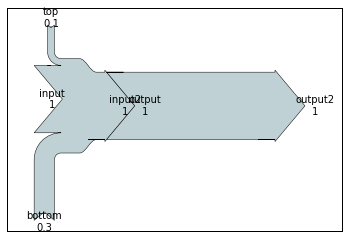

In [8]:
sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1, 0.1, 0.3],
           orientations=[0, 0, 1, -1],
       labels=['input', 'output', 'top', 'bottom'],
          pathlengths=[0, 0, 0.5, 1.0])
sankey.add(flows=[1, -1],
           labels=['input2', 'output2'],
           trunklength=3.0,
          prior=0,
          connect=(1, 0))
sankey.finish()

Now that we understand the basics, we can also build a diagram that introduces that outputs the second system to the bottom (by using an orientation of -1).

[Bunch(tips=[[-0.38045018  0.1       ]
  [ 0.6947228   0.        ]
  [-0.55        1.15804502]
  [-0.65       -1.57413506]], texts=[<matplotlib.text.Text object at 0x0000000007CE4828>, <matplotlib.text.Text object at 0x0000000007CE4CF8>, <matplotlib.text.Text object at 0x0000000007CE92E8>, <matplotlib.text.Text object at 0x0000000007CE9278>], flows=[ 1.  -1.   0.1  0.3], angles=[0, 0, 3, 1], patch=Poly((-0.25, 0.7) ...), text=Text(0,0,'')),
 Bunch(tips=[[ 0.6947228   0.        ]
  [ 3.52517299 -1.1947228 ]], texts=[<matplotlib.text.Text object at 0x0000000007CF0B38>, <matplotlib.text.Text object at 0x0000000007CF6048>], flows=[ 1 -1], angles=[0, 3], patch=Poly((0.275173, 0.5) ...), text=Text(1.52517,0,''))]

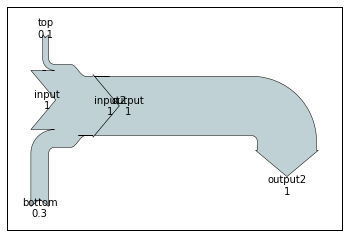

In [9]:
sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1, 0.1, 0.3],
           orientations=[0, 0, 1, -1],
       labels=['input', 'output', 'top', 'bottom'],
          pathlengths=[0, 0, 0.5, 1.0])
sankey.add(flows=[1, -1],
           orientations=[0, -1],
           labels=['input2', 'output2'],
           trunklength=3.0,
          prior=0,
          connect=(1, 0))
sankey.finish()

Why not add a third branch to our system?

[Bunch(tips=[[-0.38045018  0.1       ]
  [ 0.6947228   0.        ]
  [-0.55        1.15804502]
  [-0.65       -1.57413506]], texts=[<matplotlib.text.Text object at 0x0000000007D468D0>, <matplotlib.text.Text object at 0x0000000007D46DA0>, <matplotlib.text.Text object at 0x0000000007D4C390>, <matplotlib.text.Text object at 0x0000000007D4C320>], flows=[ 1.  -1.   0.1  0.3], angles=[0, 0, 3, 1], patch=Poly((-0.25, 0.7) ...), text=Text(0,0,'')),
 Bunch(tips=[[ 0.6947228   0.        ]
  [ 3.21989579  0.        ]], texts=[<matplotlib.text.Text object at 0x0000000007D53BE0>, <matplotlib.text.Text object at 0x0000000007D580F0>], flows=[ 1 -1], angles=[0, 0], patch=Poly((0.275173, 0.5) ...), text=Text(1.52517,0,'')),
 Bunch(tips=[[ 3.21989579  0.        ]
  [ 4.10138391  3.15      ]], texts=[<matplotlib.text.Text object at 0x0000000007D5F2B0>, <matplotlib.text.Text object at 0x0000000007D5F7B8>], flows=[ 1.  -0.3], angles=[0, 0], patch=Poly((3.05035, 0.75) ...), text=Text(3.55035,1.75,''))]

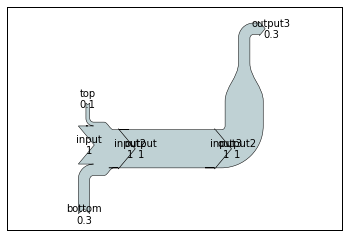

In [ ]:
sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1, 0.1, 0.3],
           orientations=[0, 0, 1, -1],
       labels=['input', 'output', 'top', 'bottom'],
          pathlengths=[0, 0, 0.5, 1.0])
sankey.add(flows=[1, -1],
           orientations=[0, 0],
           labels=['input2', 'output2'],
           trunklength=3.0,
          prior=0,
          connect=(1, 0))
sankey.add(flows=[1, -0.3],
           orientations=[1, -1],
          labels=['input3', 'output3'],
          prior=1,
           trunklength=2.5,
          connect=(1, 0))
sankey.finish()

# Final project: why MOOCs are hard 

Finally, I'd like to finish this article by making a Sankey diagram with some stats from the MOOC I recently followed. It turns out that only a fraction (2%) of the learners that join a class actually get a statement of accomplishment. 

- Total learners joined: 14,460
- Learners that visited the course: 9,720
- Learners that watched a lecture: 7,047
- Learners that browsed the forums: 3,059
- Learners that submitted an exercise: 2,149
- Learners that obtained a grade >70% (got an Statement of Accomplishment): 351

I would like to represent this data with a Sankey diagram.

(-69.520770818713231, 5.1500000000000012)

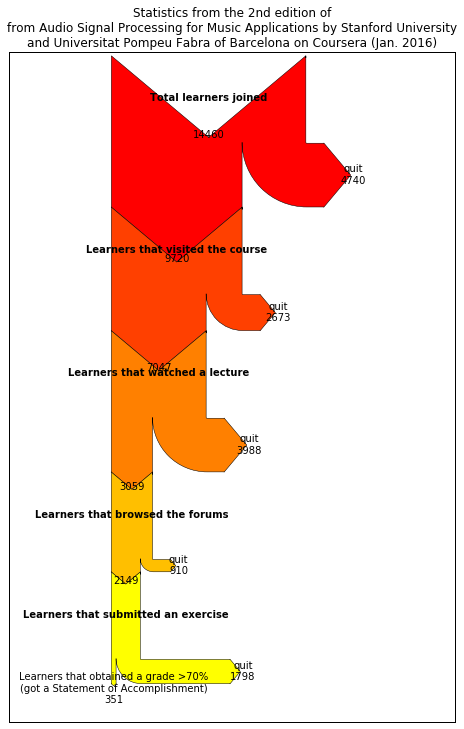

In [74]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Statistics from the 2nd edition of\nfrom Audio Signal Processing for Music Applications by Stanford University\nand Universitat Pompeu Fabra of Barcelona on Coursera (Jan. 2016)")
learners = [14460, 9720, 7047, 3059, 2149, 351]
labels = ["Total learners joined", "Learners that visited the course", "Learners that watched a lecture",
         "Learners that browsed the forums", "Learners that submitted an exercise", 
          "Learners that obtained a grade >70%\n(got a Statement of Accomplishment)"]
colors = ["#FF0000", "#FF4000", "#FF8000", "#FFBF00", "#FFFF00"]

sankey = Sankey(ax=ax, scale=0.0015, offset=0.3)
for input_learner, output_learner, label, prior, color in zip(learners[:-1], learners[1:], 
                                                              labels, [None, 0, 1, 2, 3],
                                                             colors):
    if prior != 3:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', None, 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 2],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
    else:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', labels[-1], 'quit'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 10],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
ylim = plt.ylim()
plt.ylim(ylim[0]*1.05, ylim[1])